In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\ur suppliers\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


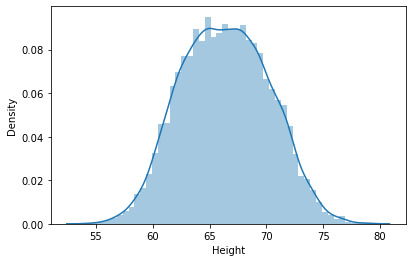

In [6]:
# using the normal distribution to see which column has ouliers

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(df['Height'])
plt.show()

In [7]:
# since the value of hieight is normally distributed so we can perform outlier detection

print("mean value",df['Height'].mean())
print("standard deviation",df['Height'].std())
print("maximum",df['Height'].min())
print("standard deviation",df['Height'].max())

mean value 66.36755975482106
standard deviation 3.8475281207732324
standard deviation 54.2631333250971
standard deviation 78.9987423463896


In [10]:
# finding the boundries value\
print("highest allowed",df['Height'].mean() + 3* df['Height'].std())

print("lowest allowed",df['Height'].mean() - 3* df['Height'].std())

highest allowed 77.91014411714076
lowest allowed 54.82497539250136


In [12]:
# finding the outliers
df[(df['Height'] > 77.91) | (df['Height'] < 54.82)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127



# # trimming the outliers

In [30]:
# it is concluded that the data has 7 outliers

new_df = df[(df['Height'] < 77.91) & (df['Height'] > 54.82)]
new_df

,Height,Weight,z_score
count,9995.000000,9995.000000,9995.000000
mean,66.361547,161.395790,-0.001583
std,3.838599,32.053035,0.997741
min,54.824975,64.700127,-3.146027
25%,63.504747,135.809891,-0.744066
50%,66.317573,161.193051,-0.012992
75%,69.169322,187.118882,0.728198
max,77.547186,255.863326,2.905665


 ## approach 2
 ## calculating z score

In [17]:
# the formulate for calculating z score is (x- mean)/sd
df['z_score']= (df['Height']- df['Height'].mean()) /df['Height'].std()

In [18]:
df.head()

,Gender,Height,Weight,z_score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [19]:
# now find if the z -score lies between -3 and + 3
df[(df['z_score']>3)]

,Gender,Height,Weight,z_score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [21]:
df[(df['z_score']>3)]

,Gender,Height,Weight,z_score
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [23]:
df[(df['z_score']>3) | (df['z_score']<-3)]

,Gender,Height,Weight,z_score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [24]:
# now trimming
df[(df['z_score'] < 3 ) & (df['z_score'] > -3)]

,Gender,Height,Weight,z_score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


## capping

In [25]:
upper_limit = df['Height'].mean() + 3 * df['Height'].std()
lower_limit =  df['Height'].mean() - 3 * df['Height'].std()

In [27]:
# now applying condition np.where(x,y,z) where x is the condition,y is the true statement and z is false

df['Height'] = np.where( df['Height']> upper_limit,
                        upper_limit,
                       np.where( df['Height']<lower_limit,lower_limit, df['Height']
                       )
                       )



In [29]:
df['Height'].describe()

count    10000.000000
mean        66.367321
std          3.846314
min         54.824975
25%         63.505620
50%         66.318070
75%         69.174262
max         77.910144
Name: Height, dtype: float64